### Importing necessary libraries

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Combining individual months sales data file into one file named as All_Sales_Data.csv

In [ ]:
all_months_data = pd.DataFrame()
files = [file for file in os.listdir("/content/Sales_Data")]

for file in files:
  df = pd.read_csv("/content/Sales_Data/{}".format(file))
  all_months_data = all_months_data.append(df)

all_months_data.to_csv("All_Sales_Data.csv", index=False)

### Reading a newly created csv file and storing it into the dataframe

In [ ]:
df = pd.read_csv('/content/All_Sales_Data.csv')
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Checking for NaN values in the dataset

In [ ]:
df_null = df[df.isna().any(axis=1)]
df_null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185960,NaN,NaN,NaN,NaN,NaN,NaN
186136,NaN,NaN,NaN,NaN,NaN,NaN
186416,NaN,NaN,NaN,NaN,NaN,NaN
186653,NaN,NaN,NaN,NaN,NaN,NaN


### From above cell it is found that the dataset has several rows with all the values as NaN hence, dropping the rows which have all the values as NaN

In [ ]:
df = df.dropna(how='all')
df_null = df[df.isna().any(axis=1)]
df_null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Adding a column named ***Month*** and populating it by extracting values from ***Order Date*** column

In [ ]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


### On changing months columns to int based on it's value it is found that some column contains string value or

In [ ]:
temp_df = df[df['Month'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
211,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
243,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1291,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1412,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1427,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185203,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185843,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186236,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186336,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


### Based on the output of above cell it is found that the resultant data can be removed hence, removing that data

In [ ]:
df = df[df['Month'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


### Changing a month data type to integer

In [ ]:
df['Month'] = df['Month'].astype('int32')
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

### Q1. What was the best month for sales? How much revenue generated that month?

Inorder to do that we need adding one more column named as ***Sales*** which would be ***Quantity Ordered*** * ***Price Each***. Also it is known that ***Quantity Ordered*** and ***Price Each*** have data-type as object so, converting them to an appropraite data-type

In [ ]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

In [ ]:
result = df.groupby(by = 'Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Ans1. December month is proved to be the best month of sales with a revenue of 4.613443e+06 USD $. Plotting same onto the bar graph

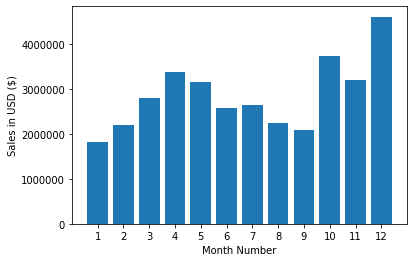

In [ ]:
months = range(1, 13)
plt.bar(x=months, height=result['Sales'])
plt.xticks(months)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

### Q2. Which city has generated the most revenue

To achieve this, a column named ***City*** needs to be created by splitting the ***Purchase Address*** column



In [ ]:
def get_city_from_address(address):
  return address.split(',')[1].strip()

def get_state_from_address(address):
  return address.split(',')[2].split(' ')[1].strip()

df['City'] = df['Purchase Address'].apply(lambda x: "{} ({})".format(get_city_from_address(x), get_state_from_address(x)))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


In [ ]:
result = df.groupby(by = 'City').sum()
result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


### Ans2. San Francisco city that has generated the maximum revenue i.e., 8.262204e+06 US ($). Plotting same onto the bar graph

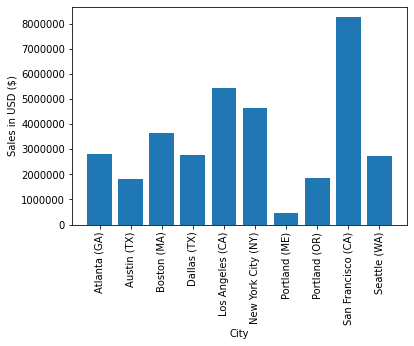

In [ ]:
cities = [city for city, df in df.groupby(by = 'City')]
plt.bar(x=cities, height=result['Sales'])
plt.xticks(cities, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Q3. What time would be the great for **advertisement** i.e., at what time maximum orders has been booked

As we know that ***Order Date*** column is object so first converting it to the DateTime datatype

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
dtype: object

In [ ]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19


In [ ]:
result = df.groupby(by = 'Hour').sum()
result

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


### Ans3. At 12:00 AM and 19:00 PM most sales has been made hence, advertisement should be done a these times only. Plotting same onto the graph

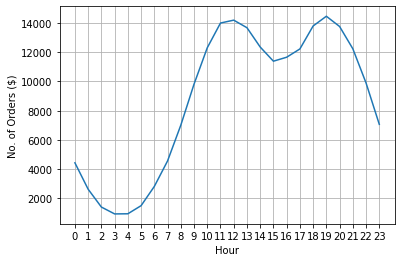

In [ ]:
hours = [hour for hour, df in df.groupby(by = 'Hour')]
plt.plot(hours, result['Quantity Ordered'])
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### Q4. City wise advertisement hours i.e., in which city on which hour maximum orders has been booked and plotting is done for the same

In [ ]:
res = df.groupby(by = ['City', 'Hour']).sum()
res.head()

Quantity Ordered  Price Each  Month     Sales
City         Hour                                               
Atlanta (GA) 0                  357    62435.44   2165  62855.02
             1                  236    44191.50   1484  44443.32
             2                  117    25188.52    793  25211.14
             3                   68     6983.90    445   7018.49
             4                   88    18906.69    558  18954.97

In [ ]:
res = df.groupby(by = ['City', 'Hour']).sum()['Quantity Ordered']
max = 0
lst_hrs = []
orders_hr = -1
counter = 1
for city_hour, orders in res.items():
  if max < orders:
    max = orders
    orders_hr = city_hour[1]

  if counter % 23 == 0:
    lst_hrs.append(orders_hr)
    max = 0
  
  counter = counter + 1

lst_hrs

[19, 12, 19, 21, 11, 19, 19, 12, 12, 19]

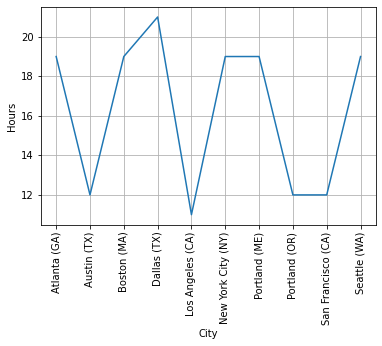

In [ ]:
cities = [city for city, df in df.groupby(by = 'City')]
plt.plot(cities, lst_hrs)
plt.xticks(cities, rotation='vertical')
plt.xlabel('City')
plt.ylabel('Hours')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

### Q5. What products are sold most?

In [ ]:
result = df.groupby(by = 'Product').sum()
result

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


### A5. From the above result it is concluded that product ***AAA Batteries (4-pack)*** sold the most

646


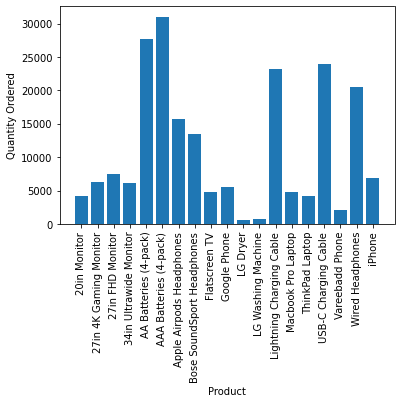

In [ ]:
print(result['Quantity Ordered'].min())
products = [product for product, df in df.groupby(by = 'Product')]
plt.bar(x=products, height=result['Quantity Ordered'])
plt.xticks(products, rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()